In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [262]:
data = pd.read_csv(r"C:\Users\arunr\Desktop\ABADS Batch 12\Python\Hypothesis Testing\property.csv")
df = pd.DataFrame(data)
df.columns = df.columns.str.lower()
print(f"Column names changed to lower case :\n\n df.columns:")
print(f"{df.columns}\n")
print(f"Shape of df :{df.shape}\n")
print(f"Data Description:\n{'*'*17}")
df.info()

Column names changed to lower case :

 df.columns:
Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'sellerg',
       'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car',
       'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lattitude',
       'longtitude', 'regionname', 'propertycount'],
      dtype='object')

Shape of df :(13580, 21)

Data Description:
*****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   suburb         13580 non-null  object 
 1   address        13580 non-null  object 
 2   rooms          13580 non-null  int64  
 3   type           13580 non-null  object 
 4   price          13580 non-null  float64
 5   method         13580 non-null  object 
 6   sellerg        13580 non-null  object 
 7   date           13580 non-null  object 
 8   distance       13580 non-null  float

In [125]:
df.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Q1. For the suburb Altona, it is postulated that a typical property sells for 800,000. Use the data at hand to test this assumption. Is the typical property price really $800,000 or has it increased? Use a significance level of 5%. 


### Ans: To test the assumption that the typical property price in Altona is $800,000, we can conduct a one-sample t-test. 

### Data Preparation: Separate price of Altona 

In [297]:
print("ALTONA-DATA:")
print('*'*12)
altona = df[df['suburb'] == 'Altona']
print("Checking for any null values in 'Price' column:")
check = int(altona[['price']].isnull().sum())
if check == 0:
    print("No null values")
    print(f"Null values :{check}")
else :
    print(f"null values = {check}")
print("\nShape of altona_data:", altona.shape)
print ("\nPrice of Altona:") 
print('*'*16)
print(altona[['price']].reset_index())
print("\nConverting df-to-list :")
price = altona[['price']].values.tolist()
print(f"\n price  = {price}")



ALTONA-DATA:
************
Checking for any null values in 'Price' column:
No null values
Null values :0

Shape of altona_data: (74, 21)

Price of Altona:
****************
    index      price
0     141   520000.0
1     142  1525000.0
2     143   720000.0
3     144  1120000.0
4     145   780000.0
..    ...        ...
69  12216   913000.0
70  12432   458000.0
71  12634  1248500.0
72  13338   920000.0
73  13339   801250.0

[74 rows x 2 columns]

Converting df-to-list :

 price  = [[520000.0], [1525000.0], [720000.0], [1120000.0], [780000.0], [1780000.0], [630000.0], [406000.0], [660000.0], [683500.0], [580000.0], [1335000.0], [800000.0], [510000.0], [1070000.0], [425000.0], [605000.0], [705000.0], [391000.0], [440000.0], [845000.0], [743000.0], [730000.0], [635000.0], [620000.0], [447000.0], [730000.0], [678000.0], [580000.0], [712000.0], [840000.0], [980000.0], [605100.0], [880000.0], [577000.0], [1030000.0], [605000.0], [753000.0], [857000.0], [1500000.0], [730000.0], [900000.0], [74000

C:\Users\arunr\AppData\Local\Temp\ipykernel_9732\2389004851.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  check = int(altona[['price']].isnull().sum())


## Hypothesis test

## STEP 1 : Formulate Hypothesis
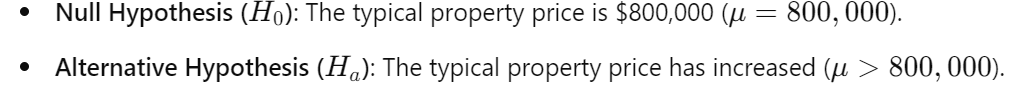

In [326]:
H0 = 800000
print("Assume Null Hypothesis(H0) =",H0)

Assume Null Hypothesis(H0) = 800000


## STEP 2: Calculate Sample Statistics:
### Calculate sample mean (x~), sample std(sd) and sample size(n)

In [127]:
sample_mean = np.mean(price)
sample_std = np.std(price, ddof=1)
sample_size = len(price)
print(f"Sample Mean: {sample_mean}")
print(f"Sample Std Dev: {sample_std}")

Sample Mean: 834830.4054054054
Sample Std Dev: 291546.0454736785


## STEP 3: Conduct Hypothesis Test
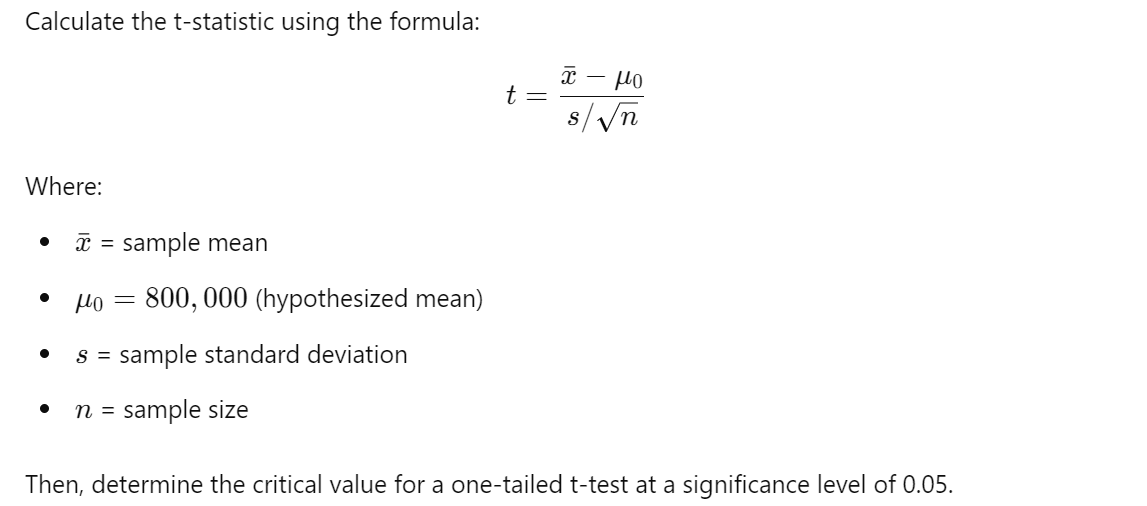

## Calculate t-statistics:

In [270]:
# Hypothesized population mean
print('mu_0 : 800000')
mu_0 = 800000

# t-statistic:
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(sample_size))

print(f"t_statistic: {t_statistic}")

mu_0 : 800000
t_statistic: 1.0277020770199676


## STEP 4:  Determine the critical value for a one-tailed test

In [271]:
critical_value = stats.t.ppf(0.95, df=sample_size - 1)
print(f"Critical Value: {critical_value}")

Critical Value: 1.6659962237714314


## Final Result:

In [327]:
print("H0 =", H0)
print(f"t_statistic : {t_statistic}")
print(f"Critical value :{critical_value}")
print("\n Summary:")
if t_statistic > critical_value:
    print("Reject H0: The typical property price has increased.")
else:
    
    print("\nAt Hypothesised Mean(H0) = t_statistic < critical_value\nH0 is a Acceptable value")

H0 = 800000
t_statistic : 1.0277020770199676
Critical value :1.6659962237714314

 Summary:

At Hypothesised Mean(H0) = t_statistic < critical_value
H0 is a Acceptable value


## Ploting of Distribution Plot

Most common price of a property in Altona: $730000.0 
Number of Properties at $730000.0 : 3Nos.


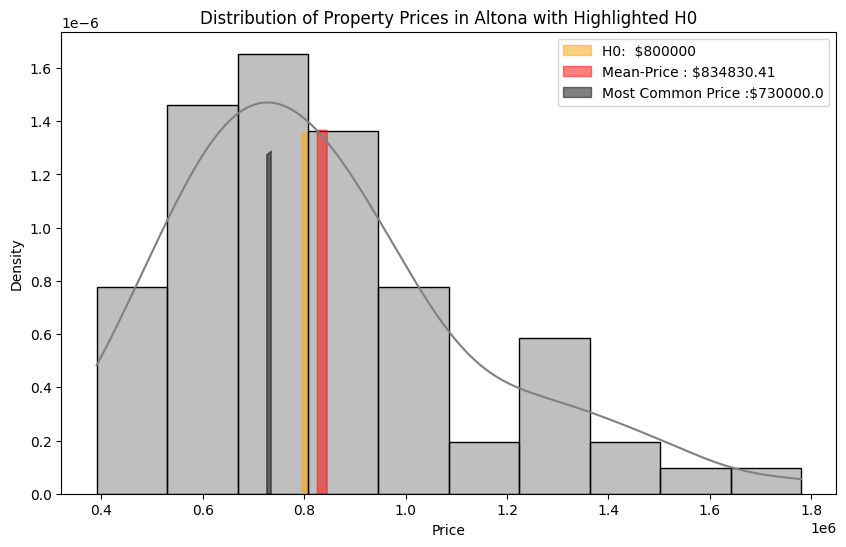

In [328]:
# Identify the most common price and its frequency

most_common_price = price_counts.idxmax()  # The price with the highest frequency
frequency = price_counts.max()  # The frequency of that price
print(f"Most common price of a property in Altona: ${most_common_price} \nNumber of Properties at ${most_common_price} : {frequency}Nos.")

plt.figure(figsize=(10, 6))

# Create a distribution plot
sns.histplot(altona['price'], kde=True, bins=10, color='grey', stat='density')

# Add labels and title
plt.title('Distribution of Property Prices in Altona with Highlighted H0')
plt.xlabel('Price')
plt.ylabel('Density')

# Calculate the mean and standard deviation
mean_price = altona['price'].mean()
mean_price = round (mean_price,2)
std_price = altona['price'].std()

# Define the x range for H0 area
x = np.linspace(mean_price - 3*std_price, mean_price + 3*std_price, 1000)

# Calculate the normal distribution for these values
y = norm.pdf(x, mean_price, std_price)

# Highlight the area under the curve for H0 (assuming H0 is that prices are around the mean)
plt.fill_between(x, y, where=(x <= mu_0 + 5000) & (x >= mu_0 - 5000), 
                 color='orange', alpha=0.5, label=f'H0:  ${mu_0}')
plt.fill_between(x, y, where=(x <= mean_price + 10000) & (x >= mean_price - 10000), 
                 color='red', alpha=0.5, label=f'Mean-Price : ${mean_price}')
plt.fill_between(x, y, where=(x >= most_common_price - 5000) & (x <= most_common_price + 5000), 
                 color='black', alpha=0.5, label=f'Most Common Price :${most_common_price}')

plt.legend()

plt.show()



## 2. For the year 2016, is there any difference in prices of properties sold in the summer months vs winter months? Consider months from October till March as winter months and the rest as summer months. Use a significance level of 5%. 


#### Ans : To determine if there is a significant difference in property prices sold during summer months (April to September) vs winter months (October to March)in year 2016, we can conduct an independent two-sample t-test.

### Data Understanding

In [329]:
df['date']

0         3/12/2016
1         4/02/2016
2         4/03/2017
3         4/03/2017
4         4/06/2016
            ...    
13575    26/08/2017
13576    26/08/2017
13577    26/08/2017
13578    26/08/2017
13579    26/08/2017
Name: date, Length: 13580, dtype: object

### date format : %d/%m/%Y

### (i) Convert to date-time format 
### (ii)Separate data of year 2016

In [330]:
# Convert the date column to datetime format (format = %d/%m/%Y)
df['date'] = pd.to_datetime(df['date'],format = '%d/%m/%Y')


# Create column 'year' & 'month'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create Season column : 'Summer' : Apr-to-Sep , 'Winter': Oct-to-Mar 
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [10, 11, 12, 1, 2, 3] else 'Summer')

#Filter Year : 2016
df_2016 = df[df['year'] == 2016]

# Separate Summer price and Winter price
summer_price = df_2016[df_2016['season'] == 'Summer']['price']
winter_price = df_2016[df['season'] == 'Winter']['price']
summer_price = summer_price.tolist()
winter_price = winter_price.tolist()

#Output:
print(f"summer_price = {summer_price}\n\n")
print(f"winter_price = {winter_price}")

summer_price = [1600000.0, 941000.0, 1876000.0, 1172500.0, 441000.0, 1200000.0, 1176500.0, 955000.0, 890000.0, 500000.0, 1100000.0, 426000.0, 1447500.0, 457000.0, 1135000.0, 1542000.0, 470000.0, 1012500.0, 1030000.0, 840000.0, 720000.0, 785000.0, 725000.0, 450000.0, 530000.0, 895000.0, 440000.0, 755000.0, 830000.0, 462500.0, 670000.0, 675000.0, 1042000.0, 910000.0, 773000.0, 540000.0, 685000.0, 805000.0, 510000.0, 612000.0, 662000.0, 978000.0, 1275000.0, 1455000.0, 1110000.0, 1550000.0, 2300000.0, 2120000.0, 1800000.0, 1800000.0, 1370000.0, 2000000.0, 2800000.0, 647000.0, 2100000.0, 2000000.0, 1532000.0, 3755000.0, 2140000.0, 980000.0, 2030000.0, 1740000.0, 2800000.0, 985000.0, 2000000.0, 1110000.0, 2840000.0, 1540000.0, 865000.0, 390000.0, 650000.0, 1165000.0, 1485000.0, 1950000.0, 520000.0, 780000.0, 1780000.0, 630000.0, 406000.0, 660000.0, 510000.0, 1070000.0, 425000.0, 730000.0, 635000.0, 620000.0, 730000.0, 678000.0, 580000.0, 712000.0, 605100.0, 880000.0, 577000.0, 753000.0, 1500

C:\Users\arunr\AppData\Local\Temp\ipykernel_9732\3550039107.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_price = df_2016[df['season'] == 'Winter']['price']


## STEP 3: Conduct t-test

In [331]:
t_statistic, p_value = stats.ttest_ind(summer_prices, winter_prices)

# Print the results
print(f"t-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

t-Statistic: -4.043386317851058
P-Value: 5.3309767667631686e-05


## Step 4: Make a decision
#### Significant Level (alpha)= 5% or 0.05

In [332]:
print("t-Test for Price difference Analysis in Summer and Winter seasons")
print('*'*65)
print(f"P-Value: {p_value}")
alpha = 0.05  
print(f"Given,\nalpha = {alpha}\n")
print("Check p_value < alpha:")
print('*'*22)
if p_value < alpha:
    print(f"It is found that p-value,({p_value}) lesser than alpha({alpha}))")
    print("Reject H0") 
    print("\nCONCLUSION :\nYES! There is a significant price difference in property between summer and winter seasons.\n")
else:
    print("Do not reject H0")


t-Test for Price difference Analysis in Summer and Winter seasons
*****************************************************************
P-Value: 5.3309767667631686e-05
Given,
alpha = 0.05

Check p_value < alpha:
**********************
It is found that p-value,(5.3309767667631686e-05) lesser than alpha(0.05))
Reject H0

CONCLUSION :
YES! There is a significant price difference in property between summer and winter seasons.



### Result : In year 2016, There was a significant price difference in property between summer and winter seasons. More details are necessary for further analysis


## Q3. For the suburb Abbotsford, what is the probability that out of 10 properties sold, 3 will not have car parking? Use the column car in the dataset. Round off your answer to 3 decimal places.

In [333]:
print("ABBOTSFORD-DATA:")
print('*'*20)
abbortsford_data = df[df['suburb'] == 'Abbotsford']
print("Checking for any null values in 'car' column:")
check = int(abbortsford_data[['car']].isnull().sum())
if check == 0:
    print("No null values")
    print(f"Null values :{check}")
else :
    print(f"null values = {check}")
print("\nShape of abbotsford_data:", abbortsford_data.shape)



ABBOTSFORD-DATA:
********************
Checking for any null values in 'car' column:
No null values
Null values :0

Shape of abbotsford_data: (56, 24)


C:\Users\arunr\AppData\Local\Temp\ipykernel_9732\2606310702.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  check = int(abbortsford_data[['car']].isnull().sum())


In [334]:
print ("\nProbability Calculation:")
print('*'*25)
print("To find : Probability of finding Propery with no parking facility")
p_no_parking = abbortsford_data['car'].value_counts(normalize=True)[0] # Probability of no parking (0)

print(f"P(): {p_no_parking}")



Probability Calculation:
*************************
To find : Probability of finding Propery with no parking facility
P(): 0.26785714285714285


## Probability of finding out of 10 properties sold, 3 will not have car parking
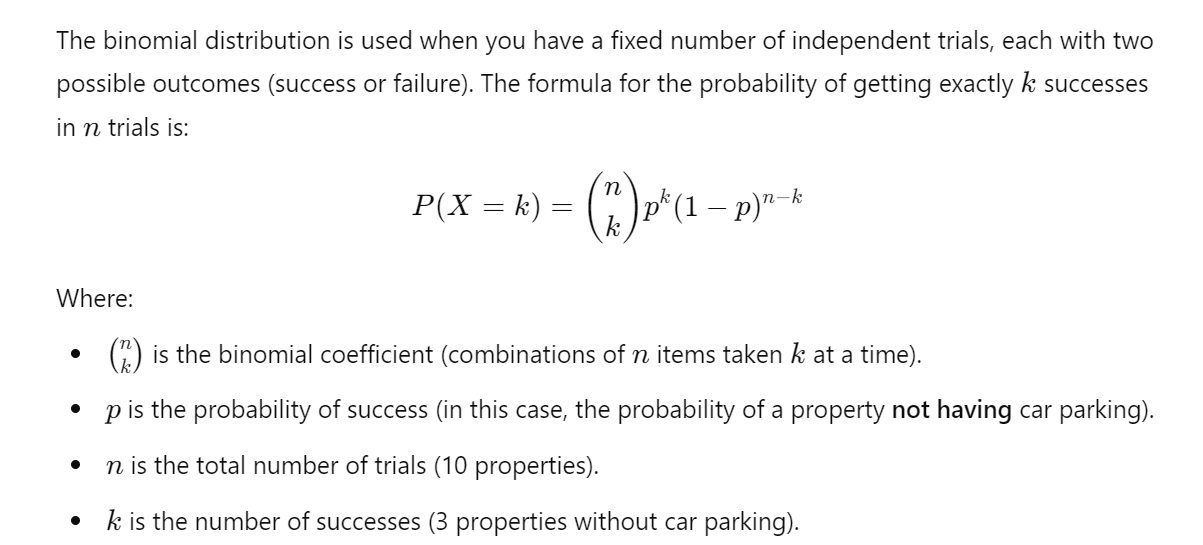

In [335]:
from math import comb

# Total properties
n = 10
# Number of properties without car parking
k = 3

# Calculate the probability using the binomial formula
probability = comb(n, k) * (p_no_parking ** k) * ((1 - p_no_parking) ** (n - k))

# Round off to 3 decimal places
rounded_probability = round(probability, 3)

print(f"Probability that out of 10 properties sold, 3 will not have car parking\n= {rounded_probability}")
print()


Probability that out of 10 properties sold, 3 will not have car parking
= 0.26



## Result:
### Probability that out of 10 properties sold, 3 will not have car parking = 0.26

## Q4. In the suburb Abbotsford, what are the chances of finding a property with 3 rooms? Round your answer to 3 decimal places.

In [336]:
print("Chance of finding a property of 3 rooms?")
#Total number of properties:
total_properties = len(abbortsford_data)
print(f"Total Num of Properties = {total_properties}")

#3 room Property
properties_with_3_rooms = len(abbortsford_data[abbortsford_data['rooms'] == 3])
print(f"Number of properties with 3 rooms = {properties_with_3_rooms}")

#Find Probability
p = properties_with_3_rooms/total_properties
result = round(p,3) # round to 3 decimal point

print(f"Probabilty of finding properties with 3 rooms = {result}")

Chance of finding a property of 3 rooms?
Total Num of Properties = 56
Number of properties with 3 rooms = 20
Probabilty of finding properties with 3 rooms = 0.357


## Result: 
### P(property with 3 rooms) = 0.357

## Q5. In the suburb Abbotsford, what are the chances of finding a property with 2 bathrooms? Round your answer to 3 decimal places.

In [337]:
print("Chance of finding a property with'2 BATHROOMS'?")
#Total number of properties:
total_properties = len(abbortsford_data)
print(f"Total Num of Properties = {total_properties}")

#2 bathroom Property
properties_with_2_bathrooms = len(abbortsford_data[abbortsford_data['bathroom'] == 2])
print(f"Number of properties with 2 bathrooms = {properties_with_2_bathrooms}")

#Find Probability
q = properties_with_2_bathrooms/total_properties
res = round(q,3) # round to 3 decimal point

print(f"Probabilty of finding properties with 2 bathrooms = {res}")

Chance of finding a property with'2 BATHROOMS'?
Total Num of Properties = 56
Number of properties with 2 bathrooms = 19
Probabilty of finding properties with 2 bathrooms = 0.339
